# Visualizing Markov Chains

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
# Import the MarkovChain class from markovchain.py
from markovchains import MarkovChain

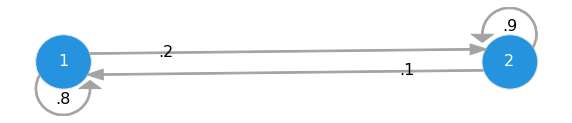

In [2]:
P = np.array([[0.8, 0.2], [0.1, 0.9]]) # Transition matrix
mc = MarkovChain(P, ['1', '2'])
mc.draw()

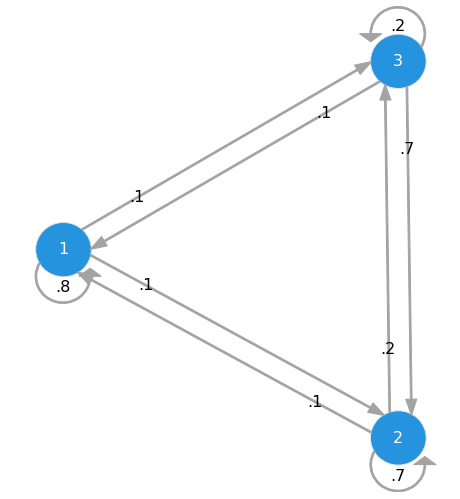

In [3]:
# Transition matrix
M = np.array([
    [0.8, 0.1, 0.1], 
    [0.1, 0.7, 0.2],
    [0.1, 0.7, 0.2],
])

mc = MarkovChain(M, ['1', '2', '3'])
mc.draw()

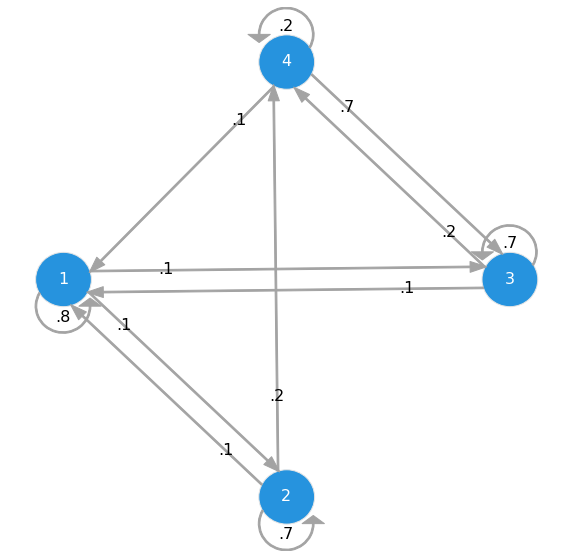

In [4]:
# Transition matrix
M = np.array([
    [0.8, 0.1, 0.1, 0.0], 
    [0.1, 0.7, 0.0, 0.2],
    [0.1, 0.0, 0.7, 0.2],
    [0.1, 0.0, 0.7, 0.2]
])
mc = MarkovChain(M, ['1', '2', '3', '4'])
mc.draw()

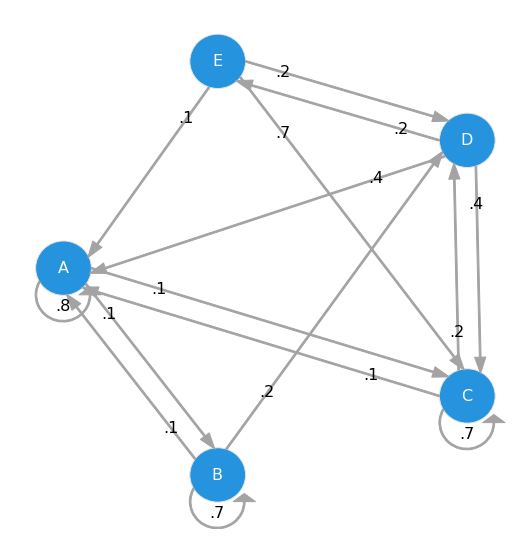

In [5]:
# Transition matrix
M = np.array([
    [0.8, 0.1, 0.1, 0.0, 0.0], 
    [0.1, 0.7, 0.0, 0.2, 0.0],
    [0.1, 0.0, 0.7, 0.2, 0.0],
    [0.4, 0.0, 0.4, 0.0, 0.2],
    [0.1, 0.0, 0.7, 0.2, 0.0]
])
mc = MarkovChain(M, ['A', 'B', 'C', 'D', 'E'])
mc.draw()

# A "six different numbers" random sequence throwing dice
<div>
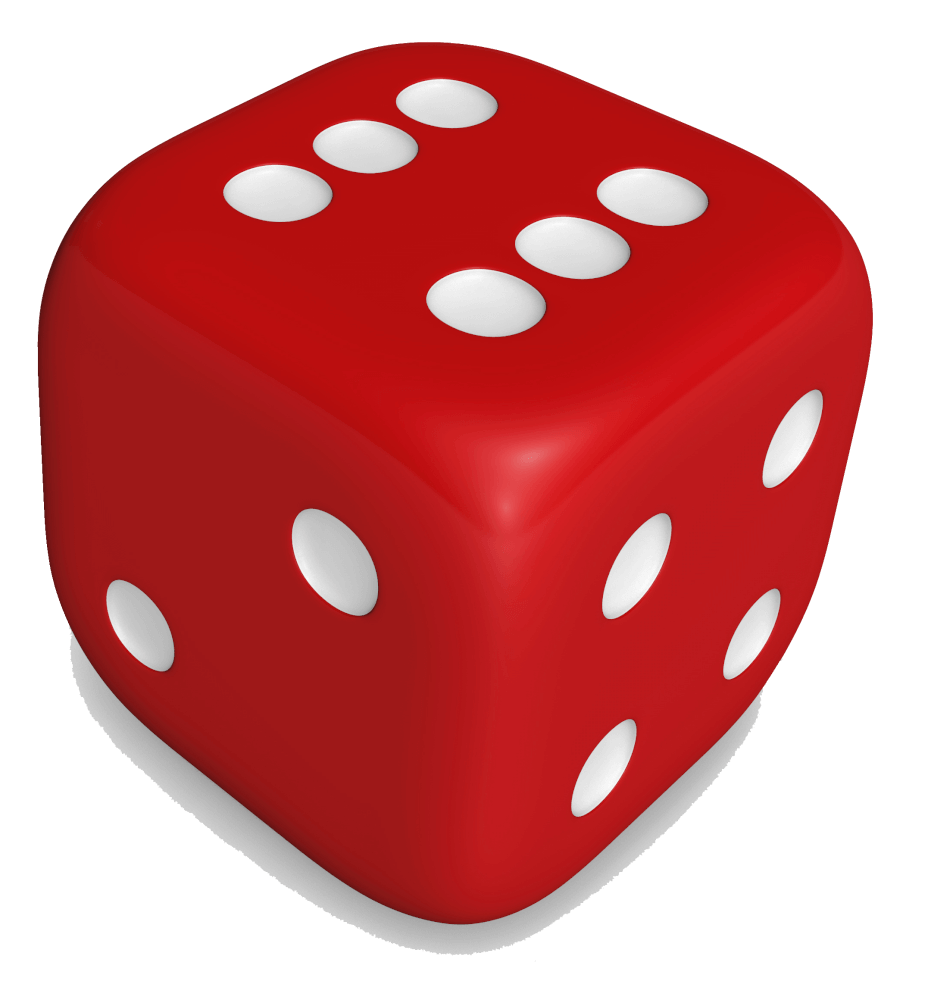
</div>
You through a dice sequentially. If the number shown has already been obtained before, you repeat the throw. Else, you continue until you have already got 5 different numbers (and, of course, then the remaining one will also be determined).

**Question**: Which is the expected number of throws until you get your "6 numbers" sequence

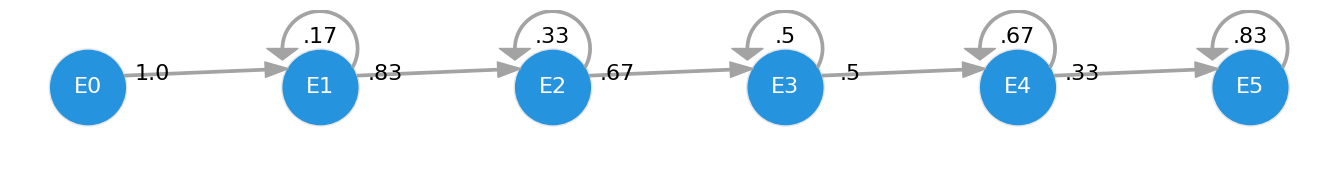

[[0.         1.         0.         0.         0.         0.        ]
 [0.         0.16666667 0.83333333 0.         0.         0.        ]
 [0.         0.         0.33333333 0.66666667 0.         0.        ]
 [0.         0.         0.         0.5        0.5        0.        ]
 [0.         0.         0.         0.         0.66666667 0.33333333]
 [0.         0.         0.         0.         0.         0.83333333]]


In [7]:
# Transition matrix
M = 1/6*np.array([
    [6, 5, 0, 0, 0, 0], 
    [1, 2, 4, 0, 0, 0], 
    [0, 0, 3, 3, 0, 0], 
    [0, 0, 0, 4, 2, 0], 
    [0, 0, 0, 0, 5, 1], 
    [0, 0, 0, 0, 0, 6]
])


mc = MarkovChain(M, ['E0', 'E1', 'E2', 'E3', 'E4', 'E5'])
mc.draw()
print(M)

## Expected "episode" length

In [5]:
I = np.identity(6)
QE = np.linalg.inv(I - M)
Y = np.ones(6); Y[5]=0
E = np.matmul(QE,Y)
E

array([8.7, 7.7, 6.5, 5. , 3. , 0. ])

## Expected "episode" length (analytical proof)

In [8]:
def matrix2latex(m, fmt=None):
    latex = r'\begin{bmatrix}'
    sc = ''
    for row in m:
        latex += sc
        sr = ''
        for col in row:
            latex += sr + (str(col) if fmt is None else fmt.format(col)) + ' '
            sr = r'&'
        sc = r'\\'
    latex += r'\end{bmatrix}'
    return latex

expr = r'M_{6\times6} = \frac{1}{6}·'+matrix2latex(M*6,'{:.0f}')
# expr += r'\end{equation}' # optional, but convenient

from IPython.display import display, Math, Latex
display(Math(expr))

<IPython.core.display.Math object>

$E_0 = 1 + \frac{6}{6}E_1 \\
E_1 = 1 + \frac{1}{6}E_1 + \frac{5}{6}E_2 \\
E_2 = 1 + \frac{2}{6}E_2 + \frac{4}{6}E_3 \\
E_3 = 1 + \frac{3}{6}E_3 + \frac{3}{6}E_4 \\
E_4 = 1 + \frac{4}{6}E_4 + \frac{2}{6}E_5 \\
E_5 = 0$
$$(I-M)·
\begin{bmatrix} E_0 \\ E_1 \\ \vdots \\ E_5 \\ \end{bmatrix} = 
\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 0 \end{bmatrix} $$

Now, let's suppose that there were some hypothetical rewards for "being" in some of these states.

For example, 0 for being in E0 (no number chosen yet) to 5 for reaching E5 (5 numbers found)

In [9]:
I = np.identity(6)
QE = np.linalg.inv(I - M)
R = np.matmul(QE,np.array([0,1,2,3,4,5]))
R

array([27.2, 27.2, 26. , 23. , 17. ,  5. ])

## Brute force simulation

In [10]:
import numpy as np
import random
import numba

@numba.jit
def run_tests(runs=250000):
    episodes = []
    rewards = []
    for r in range(runs):
        sequence = np.array([0,0,0,0,0,0]) # all empty
        k = 0
        episode = 0
        reward = 0
        # BASIC GAME
        while True:
            a = random.randint(1,6) # Return a number between A and B (both included)
            episode += 1
            reward += k
            if not a in sequence:
                sequence[k]=a
                k+=1
            if k==5: # the final digit can be determined by elimination...
                a = 21-sum(sequence)
                sequence[k]=a
                reward += k
                # print(sequence)
                break

        episodes.append(episode)
        rewards.append(reward)
        # print(episode,reward)
    return episodes,rewards

episodes, rewards = run_tests()
print('FINISHED',np.array(episodes).mean(),np.array(rewards).mean())

FINISHED 8.693772 27.179824
